# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: The t-test family
### VIDEO: Signed-rank test (Wilcoxon signed-rank for one-sample or paired samples)
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [11]:
# generate the data
rng = np.random.default_rng()
N = 50

data1 = rng.poisson(1.6, N)
# data1 = np.random.poisson(1.5, N)
data2 = rng.poisson(1, N)
# data2 = np.random.poisson(1, N)

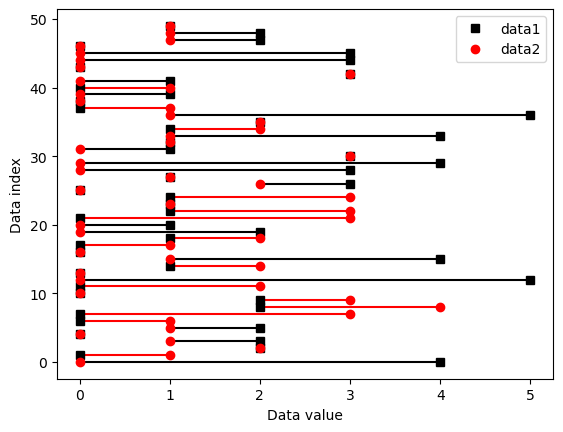

In [12]:
# visualize the data
colors = 'kr'
for i in range(N):
    # plot lines between 2 values from the same individual
    # color of a line tells which of two values is bigger
    # boolean to 0 or 1
    plt.plot([data1[i], data2[i]], [i, i], colors[int(data1[i] < data2[i])])

plt.plot(data1, np.arange(N), 'ks', markerfacecolor='k', label='data1')
plt.plot(data2, np.arange(N), 'ro', markerfacecolor='r', label='data2')

plt.ylabel('Data index')
plt.xlabel('Data value')
plt.legend()
plt.show()

In [13]:
# now for the test
t, p = stats.wilcoxon(data1, data2)
print(f'Wilcoxon z = {t}, p = {p}')

Wilcoxon z = 223.5, p = 0.1970137274225111


In [15]:
# now for the 2D space

# parameter ranges
Ns = np.arange(5, 101)
lambdas = np.linspace(1, 3, 40)

# initialize output matrix
pvals = np.zeros((len(Ns), len(lambdas)))

for ni in range(len(Ns)):
    for li in range(len(lambdas)):
        # generate some data
        data1 = np.random.poisson(lambdas[0], Ns[ni])
        data2 = np.random.poisson(lambdas[li], Ns[ni])

        # compute the statistic
        t, p = stats.wilcoxon(data1, data2)

        # store the results
        # Исключительно для удобства работы.
        # p - маленькое число, < 1; натуральный логарифм такого числа - большое отрицательное число;
        # минус натуральный логарифм - большое положительное число.
        pvals[ni, li] = -np.log(p)

# optional p-value thresholding
pvalthresh = 0.05
pvals[pvals < -np.log(pvalthresh)] = np.NaN
# Поскольку мы взяли -np.log(p), то пи-значения нужно сравнивать с -np.log(пороговое значение).
# Чтобы -np.log(p) был статистически значим, он должен быть больше -np.log(pvalthresh),
# a p < pvalthresh.

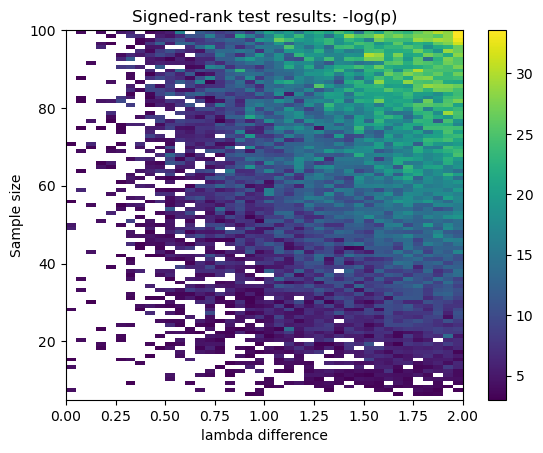

In [16]:
# now show in a heatmap!
plt.imshow(pvals, origin='lower', extent=[
           lambdas[0]-1, lambdas[-1]-1, Ns[0], Ns[-1]], aspect='auto')
plt.xlabel('lambda difference')
plt.ylabel('Sample size')
plt.title('Signed-rank test results: -log(p)')
plt.colorbar()
plt.show()

Вывод из данного графика:
для того, чтобы отбросить нулевую гипотезу (обе выборки взяты из одного распределения) необходимы как большая разница в эффекте (в тесте Вилкоксона - разница медиан), так и достаточное количество элементов в каждой выборке.